# Question 1: Exploring data

In [17]:
!pip install random
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random

[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, auc,roc_curve, roc_auc_score,precision_recall_curve, average_precision_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer, Binarizer
from sklearn.metrics import balanced_accuracy_score, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [19]:
url = "https://raw.githubusercontent.com/foxtrotmike/CS909/master/2023/A1/Xtrain.csv"
xtrain = pd.read_csv(url, header=None, sep=' ')
url2 = "https://raw.githubusercontent.com/foxtrotmike/CS909/master/2023/A1/Ytrain.csv"
ytrain = pd.read_csv(url2, header=None)
url3 = "https://raw.githubusercontent.com/foxtrotmike/CS909/master/2023/A1/Xtest.csv"
xtest = pd.read_csv(url3, header=None, sep=' ')
# load the dataset

### i.
There are 3000 examples in the training and test data respectively. And tnthe training dataset, there are 611 potive examples and 2389 negative examples.

In [20]:
print('number of training examples:', len(xtrain))
print("number of positive examples:", ytrain.groupby(0).size()[1])
print("number of negative examples:", ytrain.groupby(0).size()[-1])
print("number of test examples:", len(xtest))

number of training examples: 3000
number of positive examples: 611
number of negative examples: 2389
number of test examples: 3000


### ii.
They are numerical data and each data represents a pixel in the 28 $\times$ 28 image. The numerical values in the vector may represents the brightness or the color of each pixel as they range from 0 to 255.


Issues may limit the generalisation performances of the classifer:


* The dataset is imbalanced, since the number of the positive class is far smaller than that of negative class.
* The different brightness, position and direction of the objects in the ploted images may reduce the accuracy of the classifier.






In [21]:
print(f'the range of the values of training data x is [{xtrain.values.min()},{xtrain.values.max()}]')
print(f'the range of the values of test data x is [{xtest.values.min()},{xtest.values.max()}]')

the range of the values of training data x is [0,255]
the range of the values of test data x is [0,255]


In [22]:
rn_p = ytrain[ytrain[0] == 1].index  # row number of the positive example
rn_n = ytrain[ytrain[0] == -1].index  # row number of the negative example

random.seed(123456)
# randomly selecting 10 rows from the positive examples
rn_pr = np.array(random.sample(list(rn_p), k=10)).reshape(2, 5)
# randomly selecting 10 rows from the negative examples
rn_nr = np.array(random.sample(list(rn_n), k=10)).reshape(2, 5)

In [23]:
random.seed(123456)
# randomly selecting 10 rows from the positive examples
rn_pr = np.array(random.sample(list(rn_p), k=10)).reshape(2, 5)
# randomly selecting 10 rows from the negative examples
rn_nr = np.array(random.sample(list(rn_n), k=10)).reshape(2, 5)

Plots of positive examples

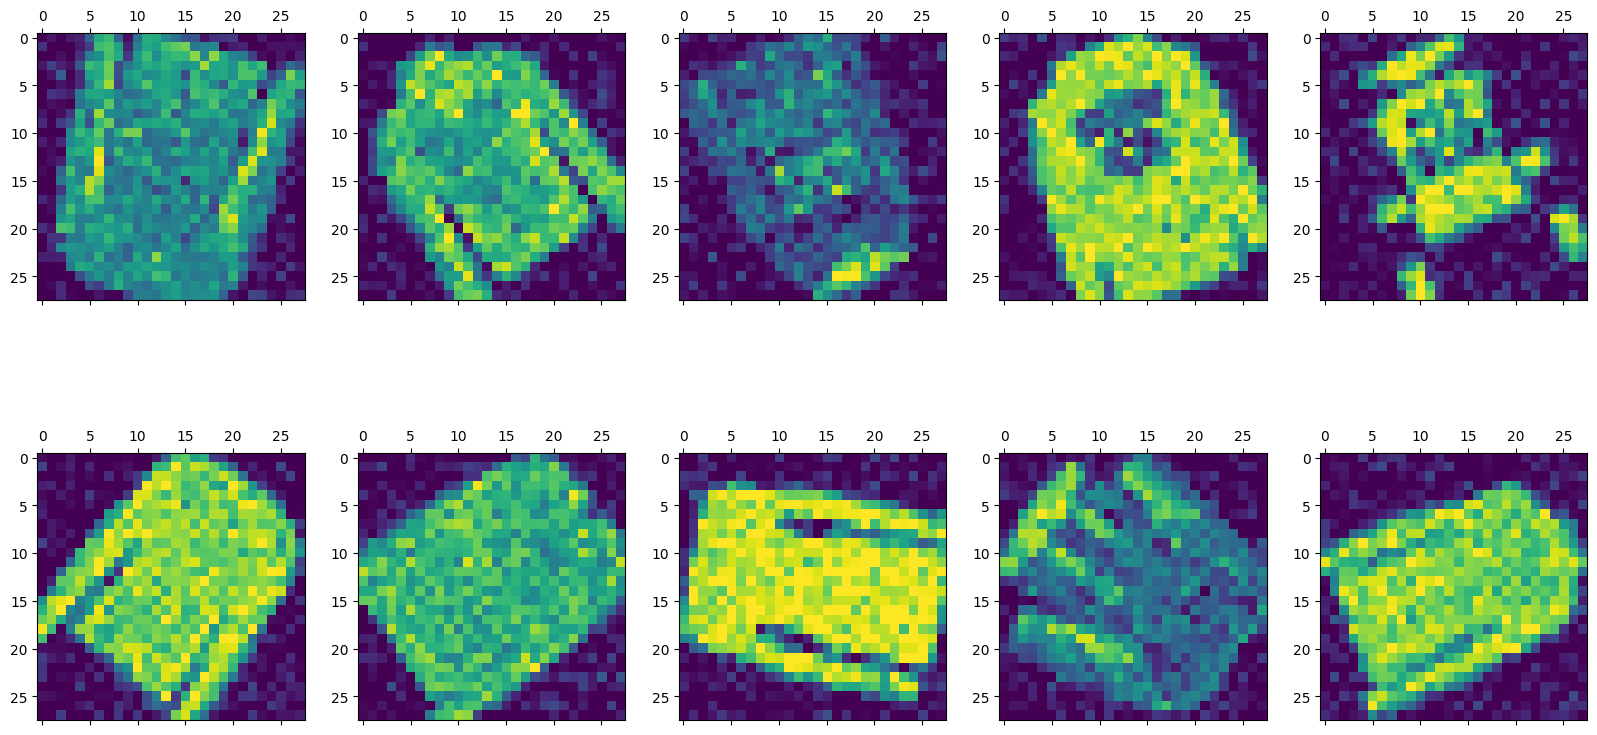

In [24]:
figure, axis = plt.subplots(2, 5, figsize=(
    20, 10))  # plot of positive examples
for i in range(2):
    for j in range(5):
        xtrain_r = np.array(xtrain.iloc[rn_pr[i, j]]).reshape(28, 28)
        axis[i, j].matshow(xtrain_r)

Plots of negative examples

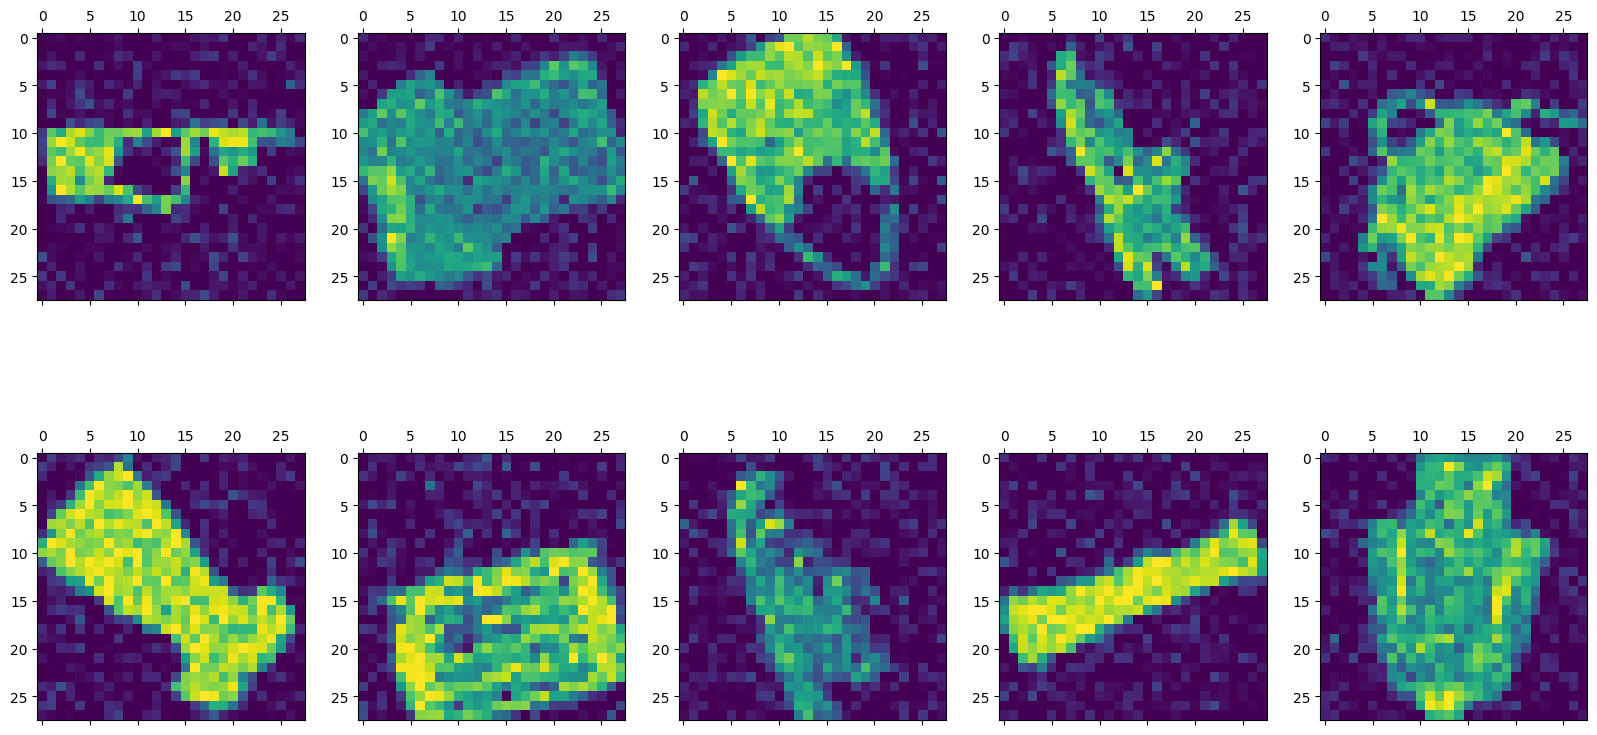

In [25]:
figure, axis = plt.subplots(2, 5, figsize=(
    20, 10))  # plot of nefative examples
for i in range(2):
    for j in range(5):
        xtrain_r = np.array(xtrain.iloc[rn_nr[i, j]]).reshape(28, 28)
        axis[i, j].matshow(xtrain_r)

Plots of test examples

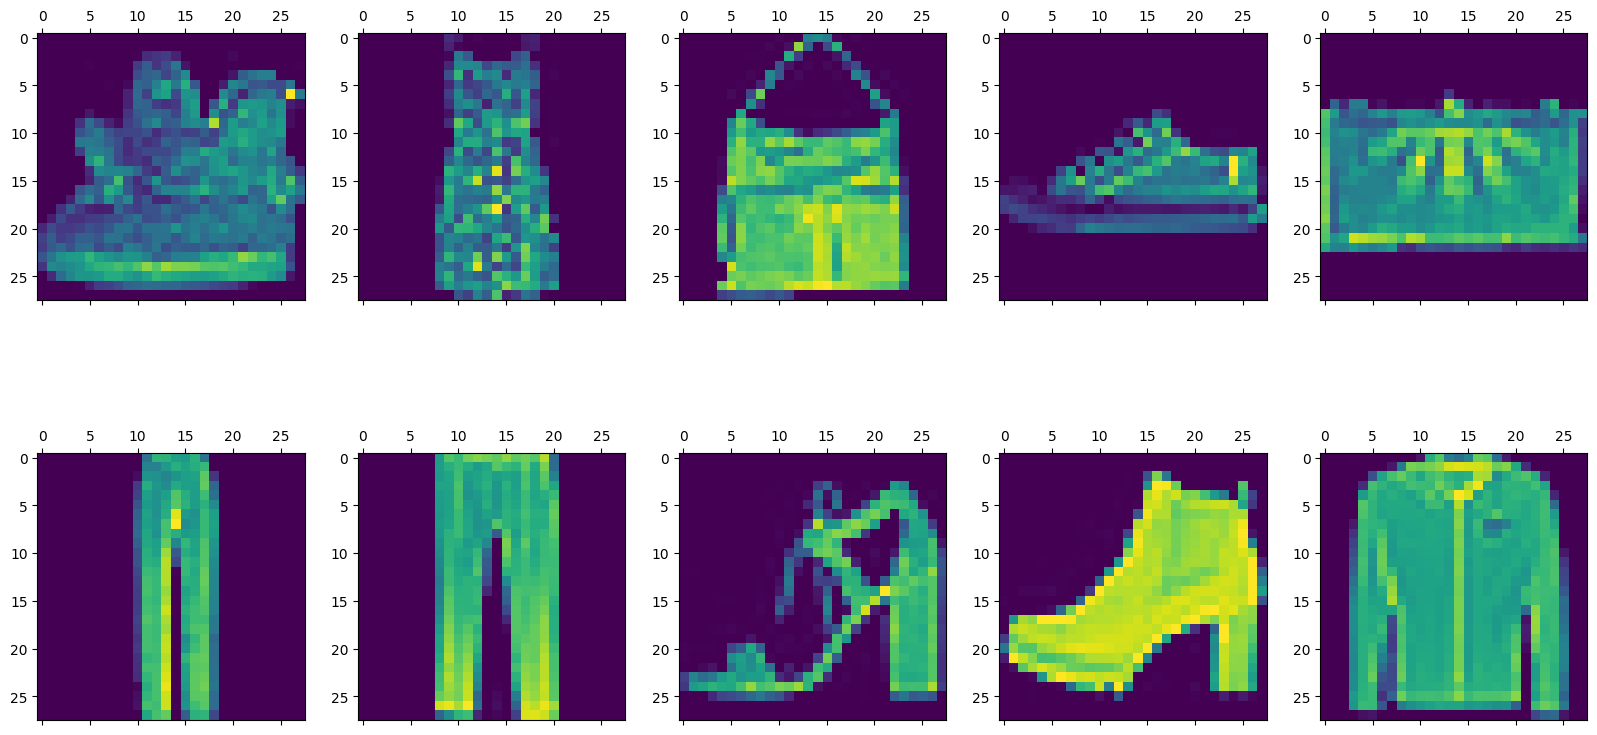

In [26]:
random.seed(1234)
rn_t = np.array([random.randint(0, 2999) for i in range(10)]).reshape(2, 5)  # randomly selecting 10 test data
figure, axis = plt.subplots(2, 5, figsize=(20, 10))  # positive
for i in range(2):
    for j in range(5):
        xtest_r = np.array(xtest.iloc[rn_t[i, j]]).reshape(28, 28)
        axis[i, j].matshow(xtest_r)

### iii.
AUC-PR shoud be used for this classification problem, since the dataset is imblanced.
Accuracy and AUC-ROC can be misleading when dealing with imbalanced datasets.  

Accuracy doesn't take the proportion of classes into account. So it will lead to a high score even when it incorrectly predicts all examples of the minority class. 

When there is a high proportion of negative class, the ROC-AUC tend to be optimistic, since the high proportion  of negative class will lead to a high TPR and low FPR.


### iv. 
The epeccted accuracy of a ramdon classifier for this problem is 50%.
Proof by a programming experiment by following codes:

In [27]:
t = 1000 # iterations
s = [-1, 1]
acc = [[] for i in range(t)]
for i in range(t):
    yr = np.random.choice(s, 3000)  # generate randoms labels
    ytr = ytrain.copy()
    ytr[1] = yr
    ncp = sum(ytr[0] == ytr[1])
    acc[i] = ncp/3000

print("the expectde accuracy of a random classifier:", round(np.mean(acc), 2))

the expectde accuracy of a random classifier: 0.5


### v.
The AUC-ROC of a random classier is 0.5. 

The AUC-PR of a random classier depends on the fraction of the postive examples. In this problem, it should be aroud  $611/3000 ≈ 0.204$

In [28]:
t = 1000
roc_auc = [[] for i in range(t)]
pr_auc = [[] for i in range(t)]
for i in range(t):
    ypred = -1 + 2 * np.random.random(3000)  # random classifier
    fpr, tpr, tt = roc_curve(ytrain, ypred)
    roc_auc[i] = auc(fpr, tpr)  # compute tge average of the roc-auc
print("ROC_AUC=", round(np.mean(roc_auc), 2))

for i in range(t):
    ypred = -1 + 2 * np.random.random(3000)  # random classifier
    P, R, tt = precision_recall_curve(ytrain, ypred)
    pr_auc[i] = average_precision_score(ytrain, ypred)

print("PR_AUC=", round(np.mean(pr_auc), 2))

ROC_AUC= 0.5
PR_AUC= 0.21


# Question 2: Nearest Neighbor Classifier

In [29]:
y = np.array(ytrain).flatten()
perf = pd.DataFrame({
    # "fold": ["Fold 0", "Fold 1", "Fold 2", "Fold 3", "Fold 4"],
    "accuracy": [[] for i in range(5)],
    "balanced accuracy": [[] for i in range(5)],
    "roc_auc": [[] for i in range(5)],
    "pr_auc": [[] for i in range(5)]
})
perf.index = ["Fold 1", "Fold 2", "Fold 3",
              "Fold 4", "Fold 5"]  # change the row names

### i.  average and stadard deviation of each performace metric
| | average | standard deviation |
|---|---|---|
|accuracy| 0.863667 | 0.014405|
|balanced accuracy | 0.782216 | 0.033724| 
|roc_auc| 0.875870 | 0.020449 |
|pr_auc | 0.621489 | 0.032960|




In [30]:

perf_df = perf.copy()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)  # 5-fold stratified CV

for i, (tr_idx, v_idx) in enumerate(skf.split(xtrain, y)):
    Xtr, Xv = xtrain.iloc[tr_idx], xtrain.iloc[v_idx]
    ytr, yv = y[tr_idx], y[v_idx]
    sknn = KNeighborsClassifier(n_neighbors=3)
    sknn.fit(Xtr, ytr)
    z_score = sknn.predict_proba(Xv)[..., 1]
    z_label = sknn.predict(Xv)
    perf_df.iat[i, 0] = accuracy_score(yv, z_label)
    perf_df.iat[i, 1] = balanced_accuracy_score(yv, z_label)
    perf_df.iat[i, 2] = roc_auc_score(yv, z_score)
    perf_df.iat[i, 3] = average_precision_score(yv, z_score)

print(perf_df)
print(pd.DataFrame({"mean": perf_df.mean(), "std": perf_df.std()}))

        accuracy balanced accuracy   roc_auc    pr_auc
Fold 1  0.863333          0.779923  0.892397  0.631259
Fold 2  0.871667          0.785153  0.874966    0.6424
Fold 3  0.883333          0.829104  0.899925  0.658594
Fold 4  0.848333          0.733881   0.85197  0.595919
Fold 5  0.851667          0.783019  0.860093  0.579274
                       mean       std
accuracy           0.863667  0.014405
balanced accuracy  0.782216  0.033724
roc_auc            0.875870  0.020449
pr_auc             0.621489  0.032960


### ii. ROC abd PR curve plot of the fold 5

The results of ROC-AUC and PR-AUC of both the classifier is significatly better than a random classifier. However ROC-AUC gives a higher value than PR-AUC, which also verifies that for datasets with a higher proportion of negative samples, ROC-AUC tend to give more optimistic results than the actual.

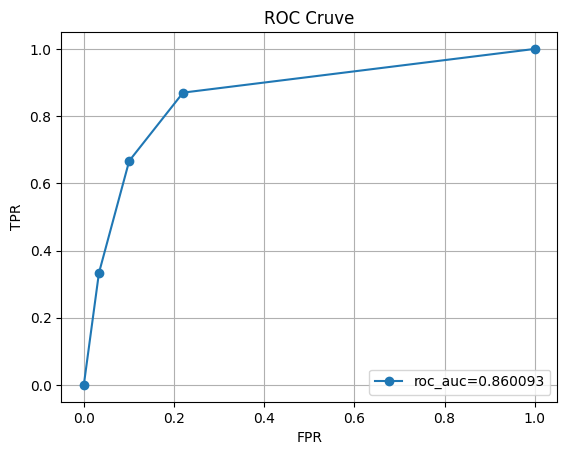

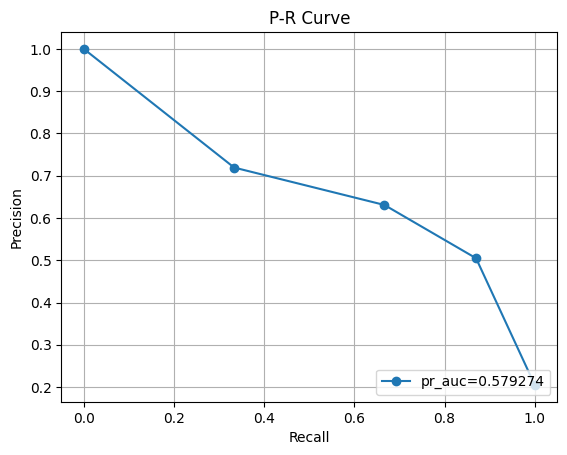

In [31]:
def myROC(y, z, pstr='ROC Cruve'):
    fpr, tpr, t = roc_curve(y, z)
    roc_auc = roc_auc_score(y, z)
    plt.plot(fpr, tpr, 'o-', label="roc_auc="+str(round(roc_auc, 6)))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc=4)
    plt.title(pstr)
    plt.grid()
    plt.show()


def myPRC(y, z, pstr="P-R Curve"):
    P, R, tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    plt.plot(R, P, 'o-', label="pr_auc="+str(round(pr_auc, 6)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=4)
    plt.grid()
    plt.title(pstr)
    plt.show()


myROC(yv, z_score)
myPRC(yv, z_score)


### iii. Impact of pre-processing

| |StanadardScaler| MinMaxScaler|Normalizer | non-scaling| 
|---|---|---|---|---|
|mean accuracy      |0.874667 | 0.870667| 0.880000 | 0.863667|
|mean balanced accuracy |0.802526 | 0.795146| 0.857045 | 0.782216|
|mean roc_auc       |0.880530| 0.889813| 0.921681|  0.875870|
|mean pr_auc       |0.639360 |0.653468 | 0.681699| 0.621489|

It is obvious that all of the pre-processing techniques do improve predictive peformance of the classifier. However, among these 3 preprocessing method, the classifier after using normalizer always gives the best scores. This is beacuse that the normalizer scales on each feature, while MinMaxScaler and StandardScaler scale on the whole features whicg doesn't consider the structure of image data, e.g. brightness and direction of objects.


In [32]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)  # 5-fold stratified CV
for j in [StandardScaler(),MinMaxScaler(), Normalizer()]:
    perf_df1 = perf.copy()
    for i, (tr_idx, v_idx) in enumerate(skf.split(xtrain, y)):
      scaler = j.fit(xtrain)
      Xtr_sc = pd.DataFrame(scaler.transform(xtrain))

      Xtr, Xv = Xtr_sc.iloc[tr_idx], Xtr_sc.iloc[v_idx]
      ytr, yv = y[tr_idx], y[v_idx]
      sknn = KNeighborsClassifier(n_neighbors=3)
      sknn.fit(Xtr, ytr)
      z_score = sknn.predict_proba(Xv)[..., 1]
      z_label = sknn.predict(Xv)
      perf_df1.iat[i, 0] = accuracy_score(yv, z_label)
      perf_df1.iat[i, 1] = balanced_accuracy_score(yv, z_label)
      perf_df1.iat[i, 2] = roc_auc_score(yv, z_score)
      perf_df1.iat[i, 3] = average_precision_score(yv, z_score)
    
    print("perfoamce after",j)
    print(perf_df1,'\t')
    print(pd.DataFrame({"mean": perf_df1.mean(), "std": perf_df1.std()}))
    print("\n")


perfoamce after StandardScaler()
        accuracy balanced accuracy   roc_auc    pr_auc
Fold 1  0.868333          0.792218    0.8735  0.614138
Fold 2      0.88          0.814802  0.894626  0.675795
Fold 3  0.866667          0.782015  0.846972  0.587321
Fold 4  0.888333           0.81698  0.899976  0.663081
Fold 5      0.87          0.806617  0.887576  0.656466 	
                       mean       std
accuracy           0.874667  0.009235
balanced accuracy  0.802526  0.015027
roc_auc            0.880530  0.021225
pr_auc             0.639360  0.037172


perfoamce after MinMaxScaler()
        accuracy balanced accuracy   roc_auc    pr_auc
Fold 1  0.868333          0.792218  0.888187  0.656364
Fold 2  0.861667          0.791086   0.89773  0.667927
Fold 3  0.878333          0.786285  0.871519  0.650083
Fold 4  0.876667          0.806605  0.898793  0.637693
Fold 5  0.868333          0.799535  0.892835  0.655275 	
                       mean       std
accuracy           0.870667  0.006831
bala

# Question 3:  CV


### i. strategy for selecting optimal classifier

1. Define a pipeline which includes the preprocessing steps (e.g scaling) and classifiers. Based on the previous results, ```Normalier()``` will be used in the preprocssing step.

2. Define parameter grids for the hyperparameters of each classifier. 

3. Use ```GridSearchCV()```, which evaluating the performance of each hyperparamter combination using 5-fold stratified cross-validation, to choose best combination.

4. Use 5-fold stratified cross-validation to evaluate the performance of each classifier with its best hyperparamters. 

5. Compute the average performance of each classifier across all folds, and select the classifier with the best performance












**Perceptron**

In [33]:
pipe = Pipeline([('scaler', Normalizer()),('per', Perceptron(random_state=4, class_weight='balanced'))])
search_space = {'per__alpha': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06,1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,100,1000,1e+4],
                'per__penalty': ['l2','l1','elasticnet']}

gs_p = GridSearchCV(pipe, search_space, n_jobs=-1, cv=5, scoring='f1')
gs_p.fit(xtrain, y)
gs_p.best_estimator_

Pipeline(steps=[('scaler', Normalizer()),
                ('per',
                 Perceptron(alpha=1e-05, class_weight='balanced', penalty='l1',
                            random_state=4))])

**Naïve Bayes Classifier**

In [34]:
pipe_NB = Pipeline([('scaler',Normalizer()), ('GNB', GaussianNB())])
search_space = {'GNB__var_smoothing': [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]}

gs_NB = GridSearchCV(pipe_NB,search_space, n_jobs=-1, cv=5,scoring='f1')
gs_NB.fit(xtrain, y)
gs_NB.best_estimator_

Pipeline(steps=[('scaler', Normalizer()),
                ('GNB', GaussianNB(var_smoothing=1e-12))])

**Linear SVM**

In [35]:
pipe_LSVM = Pipeline([('scaler', Normalizer()), ('lsvm', LinearSVC(random_state=88,class_weight='balanced'))])
search_space = {'lsvm__C': [0.01,0.1, 1.0, 10.0,100],
         'lsvm__tol':[1e-5,1e-4,1e-3,0.01,1,10]}

gs_LSVM = GridSearchCV(pipe_LSVM, search_space, n_jobs=-1, cv=5,scoring='f1')
gs_LSVM.fit(xtrain, y)

gs_LSVM.best_estimator_

Pipeline(steps=[('scaler', Normalizer()),
                ('lsvm',
                 LinearSVC(C=0.1, class_weight='balanced', random_state=88,
                           tol=10))])

**Kernelized SVM**

In [36]:
pipe_SVM = Pipeline([('scaler', Normalizer()),('svm', SVC(class_weight='balanced'))])
search_space = {'svm__C': [1e-5,1e-4,0.001, 0.01, 0.1, 1.0, 10.0, 1e+2],
         'svm__gamma':[1e-5,1e-4, 0.001, 0.01, 0.1]}

gs_SVM = GridSearchCV(pipe_SVM, search_space, n_jobs=-1, cv=5, scoring='f1')
gs_SVM.fit(xtrain, y)

gs_SVM.best_estimator_

Pipeline(steps=[('scaler', Normalizer()),
                ('svm', SVC(C=10.0, class_weight='balanced', gamma=0.1))])

### ii.
Since the data is imbalanced, performance metrics balanced accuracy, PR-AUC and f1 score are used to evaluetd the performances of theses classifiers. According to the average perfromace score (output as seen blow), the **kernelized SVM** with $C=10$ and $gamma=0.1$ is the best one among these five classifiers. 

The cross validation results of kernelized SVM:
| |mean accuracy | mean balanced accuracy | mean roc auc | mean pr auc|
|---|---|---|---|---|
|kernelized SVM |0.845 | 0.853368 | 0.910316  |  0.696906  |

In [37]:
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)  # 5-fold stratified CV

cv_score = pd.DataFrame({
    "mean balanced accuracy": [[] for i in range(4)],
    "mean pr_auc": [[] for i in range(4)],
    "mean f1 score": [[] for i in range(4)]
})
cv_score.index = ["Perceptron","Naïve Bayes","Linear SVM","Kernelized SVM"]  # change the row names

for i,j in enumerate([gs_p.best_estimator_,gs_NB.best_estimator_,gs_LSVM.best_estimator_,gs_SVM.best_estimator_]):
    cv_score.iat[i,0] = np.mean(cross_val_score(j,xtrain,y,cv=skf,scoring='balanced_accuracy', n_jobs=-1))
    cv_score.iat[i,1] = np.mean(cross_val_score(j,xtrain,y,cv=skf,scoring='average_precision', n_jobs=-1))
    cv_score.iat[i,2] = np.mean(cross_val_score(j,xtrain,y,cv=skf,scoring='f1', n_jobs=-1))
  
print('The Average Performance of Each Classifier')  
print(cv_score)



The Average Performance of Each Classifier
               mean balanced accuracy mean pr_auc mean f1 score
Perceptron                   0.801412    0.640074      0.608717
Naïve Bayes                  0.805206    0.506921      0.616313
Linear SVM                   0.827356    0.693897      0.667689
Kernelized SVM               0.853368    0.696906      0.695171


In [38]:
 m_acc = np.mean(cross_val_score(gs_SVM.best_estimator_,xtrain,y,cv=skf, n_jobs=-1))  # accuracy
 m_bacc= np.mean(cross_val_score(gs_SVM.best_estimator_,xtrain,y,cv=skf,scoring='balanced_accuracy', n_jobs=-1)) # balanced accuracy
 m_roc_auc= np.mean(cross_val_score(gs_SVM.best_estimator_,xtrain,y,cv=skf,scoring='roc_auc', n_jobs=-1)) # roc-auc
 m_pr_auc= np.mean(cross_val_score(gs_SVM.best_estimator_,xtrain,y,cv=skf,scoring='average_precision', n_jobs=-1)) # pr-auc


In [39]:
d = {'mean accuracy': [m_acc],
      'mean balanced accuracy': [m_bacc],
      'mean roc auc': [m_roc_auc],
      'mean pr auc': [m_pr_auc]}
 
perf_svm = pd.DataFrame(d)  # combine these perfomance into a dataframe
perf_svm.index=['kernelized SVM']
print(perf_svm)

                mean accuracy  mean balanced accuracy  mean roc auc  \
kernelized SVM          0.845                0.853368      0.910316   

                mean pr auc  
kernelized SVM     0.696906  


### iii. Plot  of ROC curve of all classifiers

The ROC curves of the classifiers which are trained on the entire training data.

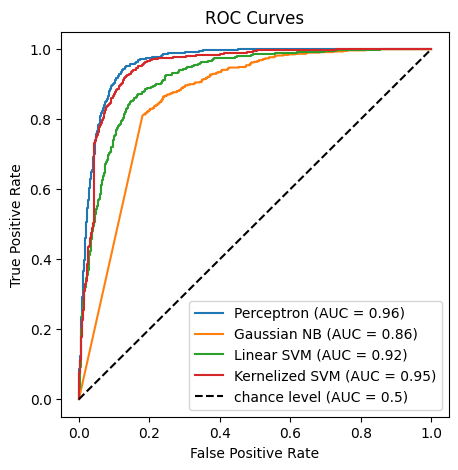

In [40]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_estimator(gs_p.best_estimator_, xtrain,y,ax=ax, name='Perceptron')
RocCurveDisplay.from_estimator(gs_NB.best_estimator_, xtrain,y,ax=ax, name='Gaussian NB')
RocCurveDisplay.from_estimator(gs_LSVM.best_estimator_, xtrain,y,ax=ax, name='Linear SVM')
RocCurveDisplay.from_estimator(gs_SVM.best_estimator_, xtrain,y,ax=ax, name='Kernelized SVM')

ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curves",
)
plt.legend()
plt.show()

### iv. Plot of PR curves of all calssfiers

The PR curves of the classifiers which are trained on the entire training data.

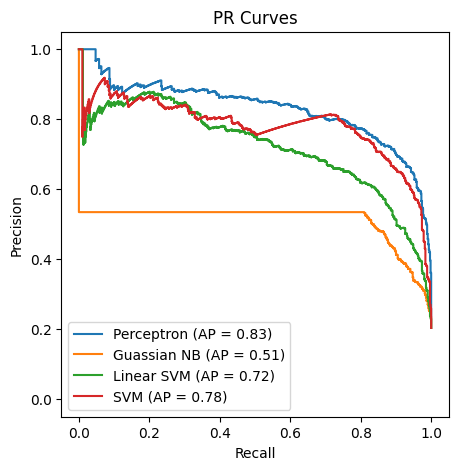

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
rm = 'decision_function'
PrecisionRecallDisplay.from_estimator(gs_p.best_estimator_,xtrain,y,
                                      name='Perceptron', ax=ax, response_method=rm)
PrecisionRecallDisplay.from_estimator(gs_NB.best_estimator_,xtrain,y,name='Guassian NB', ax=ax)
PrecisionRecallDisplay.from_estimator(gs_LSVM.best_estimator_,xtrain,y,name='Linear SVM', ax=ax, response_method=rm)
PrecisionRecallDisplay.from_estimator(gs_SVM.best_estimator_,xtrain,y,name='SVM', ax=ax, response_method=rm)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="Recall",
    ylabel="Precision",
    title="PR Curves",
)

plt.show()

### v. observations about ROC and PR curves
The last 2 plots are slightly different from the results of the cross validation. 
1. The classifier that dominates in the ROC space also dominate in the PR space.
2. For each classifier, ROC has better performance than PR. This verified that for an imbalanced dataset, ROC tend to be optimistic.
3. The performance of Perceptron trained on the entire training data is significantly better than the results of cross validation. The potential reason may be that there are overfitting when perceptron trained on the entire training data.

Therefore, in general, stratified k-fold cross-validation is  always recommended to be used for evaluating the perfromance of clasiifiers, since it can reduce the risk of overfitting and give more accurate estimate of model perfromance.



# Question 4: PCA

### i.
After reducing the dimension of the training data, there  is class overlap. That is the positions of the positive class and  negative class overlaped in the scatter plot. This will reuslt in a poor performance for the classifier when data is reduced to a 2d array since it is difficult for the classifers to distinguish between them.

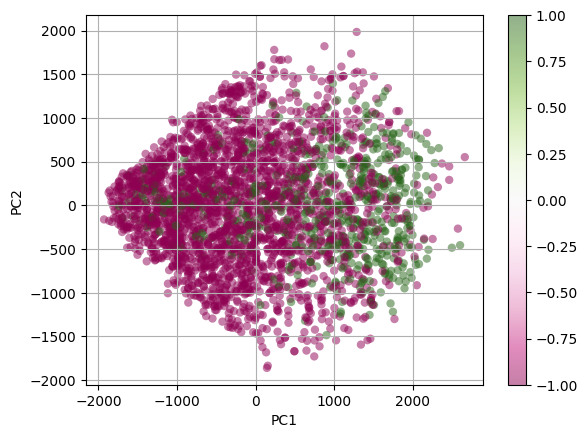

In [42]:
pca = PCA(n_components=2) 
pca.fit(xtrain)
projected = pca.transform(xtrain)  # reduce to 2 using PCA

i1 = 0  # first principal component
i2 = 1  # second principal component
plt.scatter(projected[:, i1], projected[:, i2],
            c=y, edgecolor='none', alpha=0.5,
            # cmap='RdBu');
            cmap='PiYG')
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

### ii.
After reducing dimension, the shapes of the scatter plot of the training  and test data are significantly different. 

The possible reasons are:
* The underlying distribution of the original training and test datasets is different.
* The reduced data cannot capture the ture relationships between data points of the original dataset.



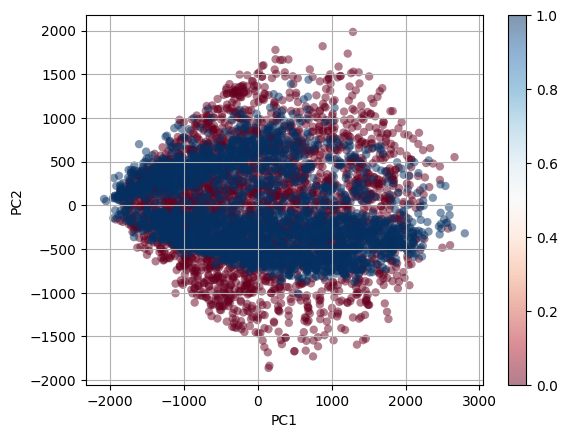

In [43]:
train_test = pd.concat([xtrain,xtest])
tr = [0 for i in range(3000)]
te = [1 for i in range(3000)]
set_label = tr + te

pca_tt = PCA(n_components=2)
pca_tt.fit(train_test)
projected_tt = pca.transform(train_test)  # reduce to 2 using PCA

i1 = 0  # first principal component
i2 = 1  # second principal component
plt.scatter(projected_tt[:, i1], projected_tt[:, i2],
            c=set_label, edgecolor='none', alpha=0.5,
            cmap='RdBu')
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


### iii. the scree graph of PCA

The number of dimensions that can explain at 95% variance in the traning set is **314**

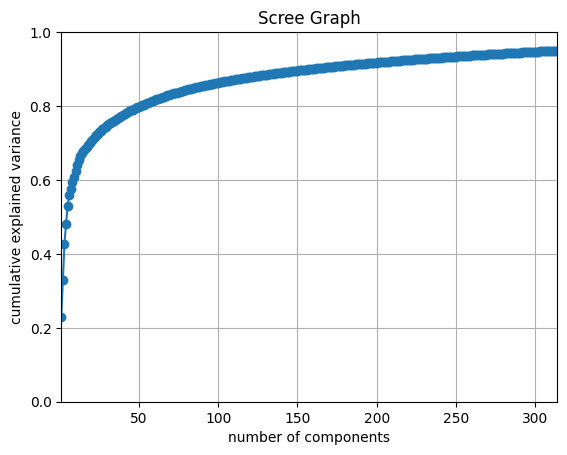

the number of components that explained 95% variance is 314


In [44]:

pca_95 = PCA(n_components=0.95, svd_solver='full')   # specify 95% of variance needs to be explained
pca_95.fit(xtrain)
proj = pca_95.transform(xtrain)
plt.figure()
plt.plot(np.arange(len(pca_95.explained_variance_ratio_))+1,
         np.cumsum(pca_95.explained_variance_ratio_), 'o-')  # plot the scree graph
plt.axis([1, len(pca_95.explained_variance_ratio_), 0, 1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree Graph')
plt.grid()
plt.show()

# cumv = np.cumsum(pca_95.explained_variance_ratio_)
# print("95% vairance",list(cumv >= 0.95).index(True))

print('the number of components that explained 95% variance is',pca_95.n_components_)


### iv.
The data are reduced to 314 dimension which explains 95% of the vairance. And kernelized SVM with $C=0.001$ and $gamma=0.00001$ are trained adter hyperparamenter tuning.


In [45]:
pca_op = PCA(n_components=0.95, svd_solver='full').fit(xtrain)
x_pca = pca_op.transform(xtrain) # Reduce the number of dimensions
search_space = {'C': [0.001, 0.01, 0.1, 1.0, 10.0,1e+2, 1e+3, 1e+4],
         'gamma': [1e-5, 1e-4, 0.001, 0.01, 0.1, 1.0, 10]}
gs_pca_SVM = GridSearchCV(SVC(class_weight='balanced'), search_space, n_jobs=-1, cv=5, scoring='f1') # hyoerparameter tuning 
gs_pca_SVM.fit(x_pca, y)

gs_pca_SVM.best_estimator_ 

SVC(C=0.001, class_weight='balanced', gamma=1e-05)

In [46]:
gs_pca_SVM.best_params_

{'C': 0.001, 'gamma': 1e-05}

The cross-validation performance of the classifier  is shown in plots below.

An average PR-AUC of 0.58 of a kernelized SVM with PCA suggests the classifier is better than a random classifer. But it can still be improved since 0.58 is far smaller than 1 which represnts a perferct classifer.

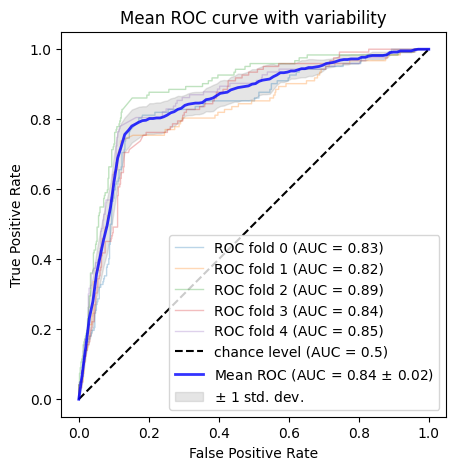

In [47]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
classifier = gs_pca_SVM.best_estimator_

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(5, 5))
for fold, (train, test) in enumerate(cv.split(x_pca, y)):
    classifier.fit(x_pca[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        x_pca[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()



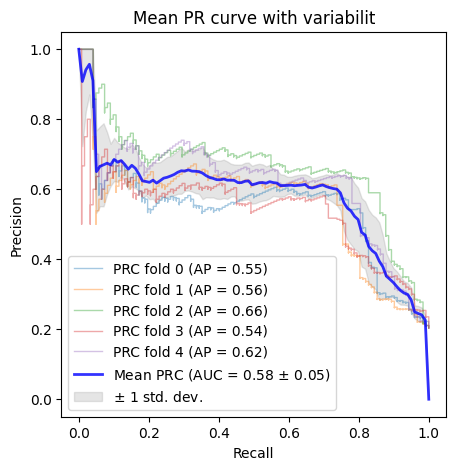

In [48]:
pres = []
aucs = []
mean_rec = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(5, 5))
for fold, (train, test) in enumerate(cv.split(x_pca, y)):
    classifier.fit(x_pca[train], y[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        x_pca[test],
        y[test],
        name=f"PRC fold {fold}",
        alpha=0.4,
        lw=1,
        ax=ax,
    )
    interp_pre = np.interp(mean_rec, np.flipud(
        viz.recall), np.flipud(viz.precision))
    interp_pre[0] = 1.0
    pres.append(interp_pre)
    aucs.append(viz.average_precision)

mean_pre = np.mean(pres, axis=0)
mean_pre[-1] = 0.0

mean_auc = auc(mean_rec, mean_pre)
std_auc = np.std(aucs)
ax.plot(
    mean_rec,
    mean_pre,
    color="b",
    label=r"Mean PRC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_pre = np.std(pres, axis=0)
pres_upper = np.minimum(mean_pre + std_pre, 1)
pres_lower = np.maximum(mean_pre - std_pre, 0)
ax.fill_between(
    mean_rec,
    pres_lower,
    pres_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="Recall",
    ylabel="Precision",
    title=f"Mean PR curve with variabilit",
)
ax.axis("square")
ax.legend(loc="lower left")
plt.show()


# Question 5: Pipeline

The pipeline developed here consists of several data preprocessing steps, hyperparameter tuning and classifier selection.

1. ```Normalizer()```: This is a data normalization step that scales each feature of the input data to have unit norm. This can help to reduce the impact of differences in the scale of different features and can improve the performance of some machine learning algorithms.
2. ```PCA()```: This is to reduce the dimension of training data.
3. Classifier training: 5 different classifers are trained on different hyperparameters.

The pipeline will used as the estimator in the ```GridSearchCV``` to find the best classifer with its best parameters.

The optimal classifer is Kernellized SVM with rbf kernel and hyperpameters $C=1$ and $gamma=1$.(as seen blow)


In [49]:
pipe_o = Pipeline([('scaler', Normalizer()),
                 ('pca',PCA(n_components=0.95, svd_solver = 'full')),
                 ('clf', SVC())])

para_space =[{'clf':[Perceptron(random_state=4, class_weight='balanced')],
              'clf__alpha':[1e-17,1e-16,1e-15,1e-14,1e-13,1e-12,1e-11],
              'clf__penalty': ['l2','l1','elasticnet']},
             {'clf':[SVC(class_weight='balanced')],
              'clf__C': [0.001, 0.01, 0.1, 1.0, 10.0, 1e+2, 1e+3, 1e+4, 1e+5],
              'clf__gamma':[1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 10,100]},
             {'clf':[GaussianNB()],
              'clf__var_smoothing': [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]},
             {'clf':[LinearSVC(class_weight='balanced',random_state=88)],
              'clf__C': [ 0.01, 0.1, 1.0, 10.0, 1e+2, 1e+3, 1e+4, 1e+5],
              'clf__tol': [1e-7, 1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.1,10]},
              {'clf':[KNeighborsClassifier()],
              'clf__n_neighbors':[3,5,7,9,11,13,15,17]},]

GS_o = GridSearchCV(pipe_o, para_space,cv=5, n_jobs=-1,scoring = 'balanced_accuracy')  # scoring = 'f1'
GS_o.fit(xtrain, y)

GS_o.best_params_

{'clf': SVC(class_weight='balanced', gamma=1), 'clf__C': 1.0, 'clf__gamma': 1}

In [50]:
GS_o.best_estimator_

Pipeline(steps=[('scaler', Normalizer()),
                ('pca', PCA(n_components=0.95, svd_solver='full')),
                ('clf', SVC(class_weight='balanced', gamma=1))])

In [51]:
ypred = GS_o.best_estimator_.decision_function(xtest)  # predict on the test set
ypred_df = pd.DataFrame(ypred)
ypred_df.to_csv("u2218094.csv", index=False, header=False) # save the results to a csv file

# Question 6

Based on previous results, in this question, ```Normalizer()``` and  kernelized SVM is used for classsification.  Sicnce the number of training data is the same as test data, this new combined dataset is balanced. 

The average and standard deviation of AUC-ROC using 5-fold stratified cross-validation is 
| |mean AUC-ROC | std ROC-AUC|
|---|---|---|
|Kernelized SVM | 0.9987477777777777 | 0.0006562928998323939|

An average ROC-AUC of 0.9987 for a balanced dataset indicates that this classifier is nearly perfrct. And high AUC-ROC suggests that the classifier has a high TPR and a low FPR.

In [52]:
x_tr_te = pd.concat([xtrain,xtest])
tr = [-1 for i in range(3000)]  # label of training set
te = [1 for i in range(3000)]  # label of test set
y_tr_te = tr + te   # balanced data

In [53]:
pipe_b = Pipeline([('scaler', Normalizer()),
                 ('clf', SVC())])

para_space_b = [{'clf':[SVC()],
                 'clf__C':[0.01, 0.1, 1.0, 10.0, 1e+2, 1e+3, 1e+4, 1e+5],
                 'clf__gamma':[1e-5, 1e-4, 0.001, 0.01, 0.1, 1.0, 10.0,100]}]

gs_b = GridSearchCV(pipe_b,para_space_b,cv=5,n_jobs=-1,scoring='roc_auc') 
gs_b.fit(x_tr_te, y_tr_te)

gs_b.best_estimator_

Pipeline(steps=[('scaler', Normalizer()), ('clf', SVC(C=10.0, gamma=1.0))])

In [56]:
skf_b = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)  # 5-fold stratified CV
auc_5 = cross_val_score(gs_b.best_estimator_,x_tr_te,y_tr_te,cv=skf_b, n_jobs=-1,scoring='roc_auc')
print('the average of AUC-ROC is', np.mean(auc_5))
print('the standard deviation of AUC-ROC is', np.std(auc_5))

the average of AUC-ROC is 0.9987477777777777
the standard deviation of AUC-ROC is 0.0006562928998323939


In [55]:
acc_5= cross_val_score(gs_b.best_estimator_,x_tr_te,y_tr_te,cv=skf_b, n_jobs=-1)
np.mean(acc_5)

0.9871666666666666